# Plotting for $\delta_\text{sys}$

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
plotting_direc = "plots/final/"
plotting_direc_svg = "plots/svg/"

general_directory = "/hpcwork/zu992399/bumphunt_paper/"
general_directory_project = "/work/rwth0934/bumphunt_paper/"
general_directory_work = "/work/zu992399/bumphunt_paper/"

plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['font.serif'] = []
#plt.rcParams['text.usetex'] = True
#plt.rcParams['figure.figsize'] = 3.5, 2.625
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['errorbar.capsize'] = 2
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16 
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.title_fontsize'] = 12
plt.rcParams['legend.fontsize'] = 12
#plt.rcParams['legend.frameon'] = True

In [68]:
perc = np.logspace(-4, -1, 100)
inds = np.linspace(0,99, 20, dtype=int)
perc = perc[inds]

ymin_global = 0
ymax_global = 1.1
yres = 0.49

color_MC = "red"
color_data = "black"
color_SB = "blue"
color_quad = "orange"

In [69]:
def plot_start():
    fig, ax = plt.subplots(2,1, sharex=True, height_ratios=[0.7,0.3], figsize = (6.4, 6))

    ax[1].axhline(0, color="black")

    return fig, ax

def plot_end(name, ymin = None, ymax =None, loc="upper right", save=True):
    line, = ax[0].plot(perc, perc, color="black", linestyle="dashed", label=r"$\pm\sigma_{stat}$")#, alpha=0.3)

    ax[0].set_ylabel(r"$\delta_{sys}^i$")
    ax[1].set_xlabel(r"$\varepsilon_B$")
    ax[1].set_ylabel(r"$\delta_{sys}^i-\delta_{sys}^{data}$")
    if ymin is None: 
        ymin = ymin_global
    if ymax is None:
        ymax = ymax_global
    ax[0].set_ylim(ymin,ymax)
    ax[1].set_xlim(1e-4, 1e-2)
    ymin, ymax = ax[1].set_ylim()
    ax[1].set_ylim(-yres, yres)
    fig.subplots_adjust(hspace=0)
    ax[0].legend(loc=loc)
    line.remove()
    plt.xscale('log')
    plt.subplots_adjust(left=0.2)

    if save: 
        plt.savefig(plotting_direc+"Rsys_"+name+".pdf")
        plt.savefig(plotting_direc_svg+"Rsys_"+name+".svg")

In [70]:

def deltasys_plot(ax, perc, delta, delta_data, label, color, linestyle="solid", plot_res=True):
    ax[0].plot(perc, delta, color=color, label=label, linestyle=linestyle)
    if plot_res:
        ax[1].plot(perc, delta-delta_data, color=color, label=label, linestyle=linestyle)

def sigma_stat_plot(ax, perc, stat):
    #ax[1].fill_between(perc, -stat, stat, color="grey", label=r"$\sigma_{stat}$", alpha=0.3)
    ax[1].plot(perc, stat, color="black", linestyle="dashed")
    ax[1].plot(perc, -stat, color="black", linestyle="dashed")
"""

def deltasys_plot(ax, perc, delta, delta_data, sigma, label, color, linestyle="solid", plot_res=True):
    ax[0].plot(perc, delta, color=color, label=label, linestyle=linestyle)
    if plot_res:
        ax[1].plot(perc, (delta-delta_data)/sigma, color=color, label=label, linestyle=linestyle)

def sigma_stat_plot(ax, perc, stat):
    #ax[1].fill_between(perc, -stat, stat, color="grey", label=r"$\sigma_{stat}$", alpha=0.3)
    ax[1].axhline(1, color="black", linestyle="dashed")
    ax[1].axhline(-1, color="black", linestyle="dashed")
"""

'\n\ndef deltasys_plot(ax, perc, delta, delta_data, sigma, label, color, linestyle="solid", plot_res=True):\n    ax[0].plot(perc, delta, color=color, label=label, linestyle=linestyle)\n    if plot_res:\n        ax[1].plot(perc, (delta-delta_data)/sigma, color=color, label=label, linestyle=linestyle)\n\ndef sigma_stat_plot(ax, perc, stat):\n    #ax[1].fill_between(perc, -stat, stat, color="grey", label=r"$\\sigma_{stat}$", alpha=0.3)\n    ax[1].axhline(1, color="black", linestyle="dashed")\n    ax[1].axhline(-1, color="black", linestyle="dashed")\n'

## CWoLa Baseline dataset

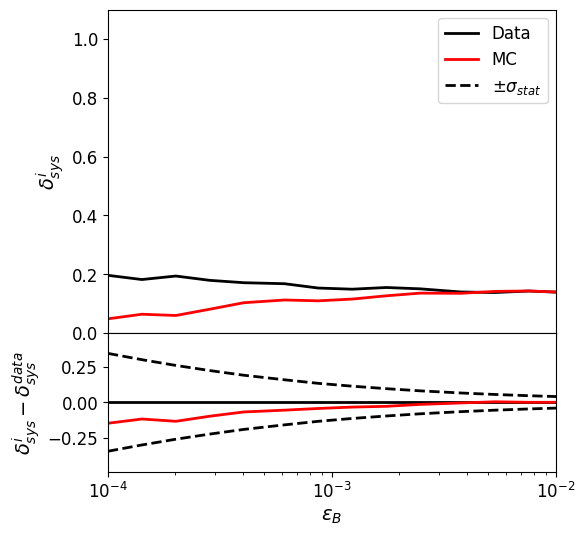

In [71]:
folder = general_directory+"cwola_without/"
data = np.mean(np.load(folder+"Rsys_epsB.npy"), axis=(1,2))[inds]
stat = np.mean(np.load(folder+"stat.npy"), axis=(1,2))[inds]
folder = general_directory+"cwola_herwig_without_2/"
delta = np.mean(np.load(folder+"Rsys_epsB.npy"), axis=(1,2))[inds]

fig, ax = plot_start()
sigma_stat_plot(ax, perc, stat)
deltasys_plot(ax, perc, data, data, "Data", color_data, plot_res=False)
deltasys_plot(ax, perc, delta, data, "MC", color_MC)
plot_end("cwola_baseline")

## CWoLa Baseline + $\Delta R$ dataset

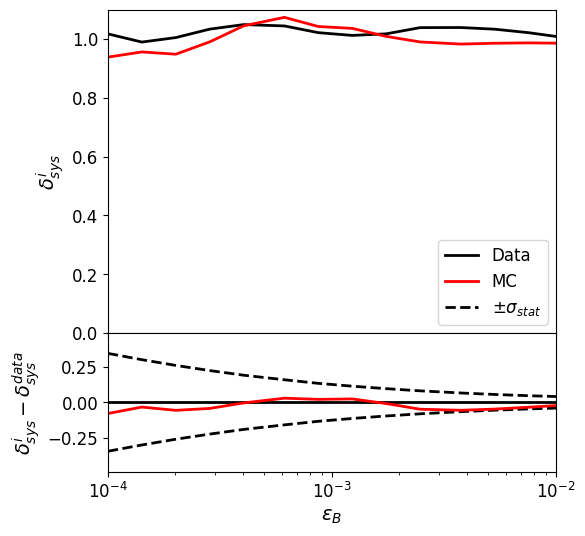

In [72]:
folder = general_directory+"cwola_baseline_DR_without_new/"
data = np.mean(np.load(folder+"Rsys_epsB.npy"), axis=(1,2))[inds]
stat = np.mean(np.load(folder+"stat.npy"), axis=(1,2))[inds]
folder = general_directory+"cwola_herwig_DR_without_new/"
delta = np.mean(np.load(folder+"Rsys_epsB.npy"), axis=(1,2))[inds]

fig, ax = plot_start()
sigma_stat_plot(ax, perc, stat)
deltasys_plot(ax, perc, data, data, "Data", color_data, plot_res=False)
deltasys_plot(ax, perc, delta, data, "MC", color_MC)
plot_end("cwola_DR", loc = "lower right")

## CATHODE Baseline dataset

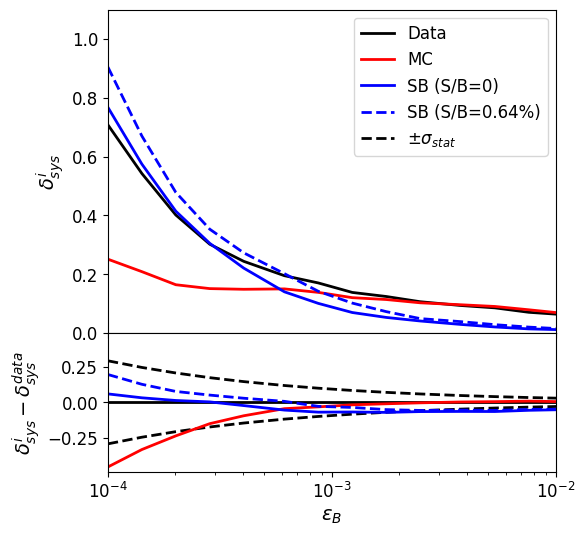

In [73]:
folder = general_directory_project+"cathode_without_ranit_rand/"
data = np.mean(np.load(folder+"Rsys_epsB.npy"), axis=(1,2))[inds]
stat = np.mean(np.load(general_directory+"cathode_without_Herwig_ranit_rand/stat.npy"), axis=(1,2))[inds]

folders = [general_directory+"cathode_without_Herwig_ranit_rand/", general_directory_project+"cathode_without_SB_stats_ranit_rand/", general_directory_project+"cathode_norm_SB_stats_ranit_rand/"]
labels = ["MC", "SB (S/B=0)", "SB (S/B=0.64%)"]
colors = [color_MC, color_SB, color_SB]
linestyles = ["solid", "solid", "dashed"]

fig, ax = plot_start()
sigma_stat_plot(ax, perc, stat)
deltasys_plot(ax, perc, data, data, "Data", color_data, plot_res=False)
for i,f in enumerate(folders):
    delta = np.mean(np.load(f+"Rsys_epsB.npy"), axis=(1,2))[inds]
    #deltasys_plot(ax, perc, delta, data, labels[i], colors[i], linestyle=linestyles[i])
    deltasys_plot(ax, perc, delta, data, labels[i], colors[i], linestyle=linestyles[i])
plot_end("cathode_baseline")

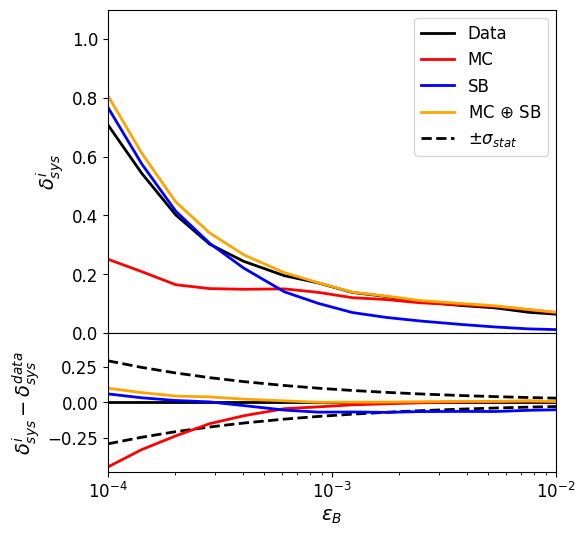

In [74]:
folder = general_directory_project+"cathode_without_ranit_rand/"
data = np.mean(np.load(folder+"Rsys_epsB.npy"), axis=(1,2))[inds]
stat = np.mean(np.load(general_directory+"cathode_without_Herwig_ranit_rand/stat.npy"), axis=(1,2))[inds]

folders = [general_directory+"cathode_without_Herwig_ranit_rand/", general_directory_project+"cathode_without_SB_stats_ranit_rand/", general_directory_project+"cathode_norm_SB_stats_ranit_rand/"]
labels = ["MC", "SB"]# (S/B=0)", "SB (S/B=0.64%)"]
colors = [color_MC, color_SB, color_SB]
linestyles = ["solid", "solid", "dashed"]

fig, ax = plot_start()
sigma_stat_plot(ax, perc, stat)
deltasys_plot(ax, perc, data, data, "Data", color_data, plot_res=False)

delta1 = np.mean(np.load(folders[0]+"Rsys_epsB.npy"), axis=(1,2))[inds]
deltasys_plot(ax, perc, delta1, data, labels[0], colors[0], linestyle=linestyles[0])
delta2 = np.mean(np.load(folders[1]+"Rsys_epsB.npy"), axis=(1,2))[inds]
deltasys_plot(ax, perc, delta2, data, labels[1], colors[1], linestyle=linestyles[1])

combined = np.sqrt(delta1**2+delta2**2)
deltasys_plot(ax, perc, combined, data, "MC $\oplus$ SB", color_quad, linestyle="solid")
    
plot_end("cathode_baseline_without")

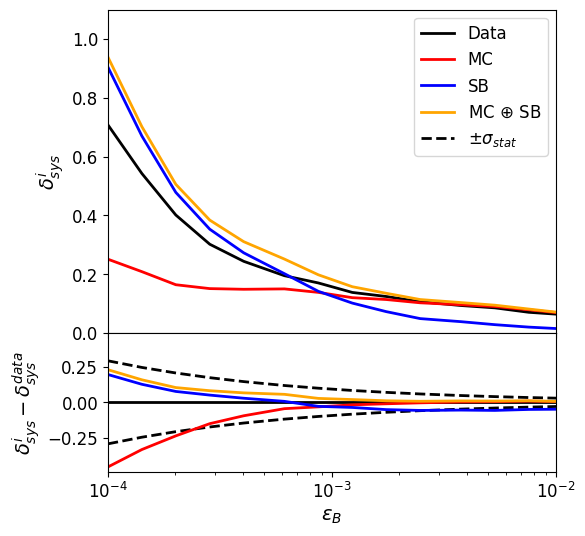

In [75]:
folder = general_directory_project+"cathode_without_ranit_rand/"
data = np.mean(np.load(folder+"Rsys_epsB.npy"), axis=(1,2))[inds]
stat = np.mean(np.load(general_directory+"cathode_without_Herwig_ranit_rand/stat.npy"), axis=(1,2))[inds]

folders = [general_directory+"cathode_without_Herwig_ranit_rand/", general_directory_project+"cathode_without_SB_stats_ranit_rand/", general_directory_project+"cathode_norm_SB_stats_ranit_rand/"]
labels = ["MC", "SB"]#, "SB (S/B=0.64%)"]
colors = [color_MC, color_SB, color_SB]
linestyles = ["solid", "solid", "dashed"]

fig, ax = plot_start()
sigma_stat_plot(ax, perc, stat)
deltasys_plot(ax, perc, data, data, "Data", color_data, plot_res=False)

delta1 = np.mean(np.load(folders[0]+"Rsys_epsB.npy"), axis=(1,2))[inds]
deltasys_plot(ax, perc, delta1, data, labels[0], colors[0], linestyle=linestyles[0])
delta2 = np.mean(np.load(folders[2]+"Rsys_epsB.npy"), axis=(1,2))[inds]
deltasys_plot(ax, perc, delta2, data, labels[1], colors[1], linestyle=linestyles[1])

combined = np.sqrt(delta1**2+delta2**2)
deltasys_plot(ax, perc, combined, data, "MC $\oplus$ SB", color_quad, linestyle="solid")
    
plot_end("cathode_baseline_norm")

## CATHODE Baseline + $\Delta R$ dataset

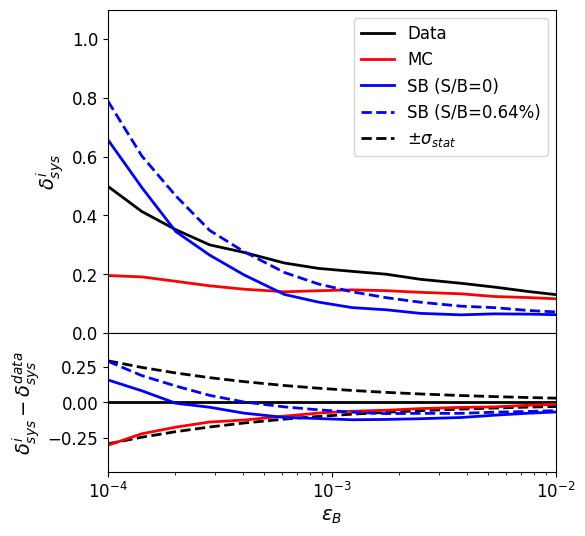

In [76]:
folder = general_directory_project+"cathode_without_DR_ranit_rand/"
data = np.mean(np.load(folder+"Rsys_epsB.npy"), axis=(1,2))[inds]
stat = np.mean(np.load(general_directory+"cathode_without_Herwig_ranit_rand/stat.npy"), axis=(1,2))[inds]

folders = [general_directory+"cathode_without_DR_Herwig_ranit_rand/", general_directory_project+"cathode_without_DR_SB_stats_ranit_rand/", general_directory_work+"cathode_norm_DR_SB_stats_ranit_rand/"]
labels = ["MC", "SB (S/B=0)", "SB (S/B=0.64%)"]
colors = [color_MC, color_SB, color_SB]
linestyles = ["solid", "solid", "dashed"]

fig, ax = plot_start()
sigma_stat_plot(ax, perc, stat)
deltasys_plot(ax, perc, data, data, "Data", color_data, plot_res=False)
for i,f in enumerate(folders):
    delta = np.mean(np.load(f+"Rsys_epsB.npy"), axis=(1,2))[inds]
    deltasys_plot(ax, perc, delta, data, labels[i], colors[i], linestyle=linestyles[i])
plot_end("cathode_DR")

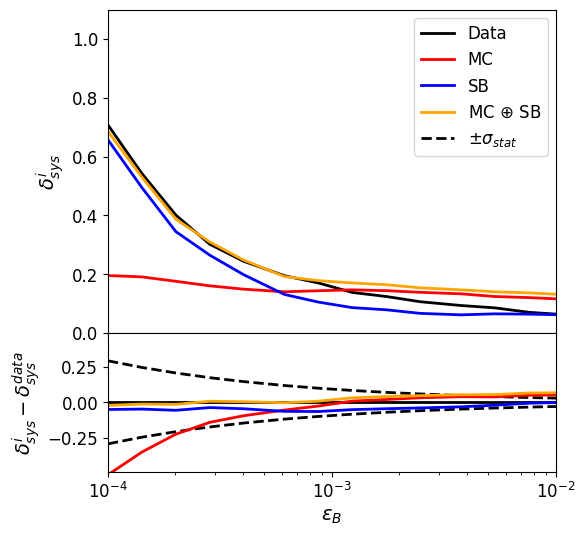

In [77]:
folder = general_directory_project+"cathode_without_ranit_rand/"
data = np.mean(np.load(folder+"Rsys_epsB.npy"), axis=(1,2))[inds]
stat = np.mean(np.load(general_directory+"cathode_without_Herwig_ranit_rand/stat.npy"), axis=(1,2))[inds]

folders = [general_directory+"cathode_without_DR_Herwig_ranit_rand/", general_directory_project+"cathode_without_DR_SB_stats_ranit_rand/", general_directory_work+"cathode_norm_DR_SB_stats_ranit_rand/"]
labels = ["MC", "SB"]# (S/B=0)", "SB (S/B=0.64%)"]
colors = [color_MC, color_SB, color_SB]
linestyles = ["solid", "solid", "dashed"]

fig, ax = plot_start()
sigma_stat_plot(ax, perc, stat)
deltasys_plot(ax, perc, data, data, "Data", color_data, plot_res=False)

delta1 = np.mean(np.load(folders[0]+"Rsys_epsB.npy"), axis=(1,2))[inds]
deltasys_plot(ax, perc, delta1, data, labels[0], colors[0], linestyle=linestyles[0])
delta2 = np.mean(np.load(folders[1]+"Rsys_epsB.npy"), axis=(1,2))[inds]
deltasys_plot(ax, perc, delta2, data, labels[1], colors[1], linestyle=linestyles[1])

combined = np.sqrt(delta1**2+delta2**2)
deltasys_plot(ax, perc, combined, data, "MC $\oplus$ SB", color_quad, linestyle="solid")
    
plot_end("cathode_DR_without")

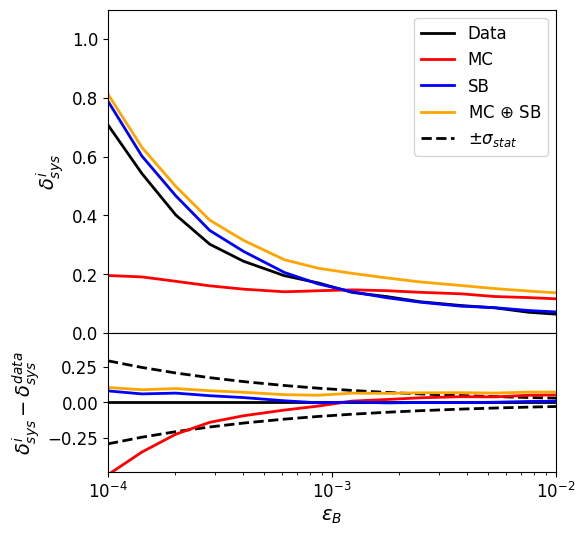

In [78]:
folder = general_directory_project+"cathode_without_ranit_rand/"
data = np.mean(np.load(folder+"Rsys_epsB.npy"), axis=(1,2))[inds]
stat = np.mean(np.load(general_directory+"cathode_without_Herwig_ranit_rand/stat.npy"), axis=(1,2))[inds]

folders = [general_directory+"cathode_without_DR_Herwig_ranit_rand/", general_directory_project+"cathode_without_DR_SB_stats_ranit_rand/", general_directory_work+"cathode_norm_DR_SB_stats_ranit_rand/"]
labels = ["MC", "SB"]# (S/B=0)", "SB (S/B=0.64%)"]
colors = [color_MC, color_SB, color_SB]
linestyles = ["solid", "solid", "dashed"]

fig, ax = plot_start()
sigma_stat_plot(ax, perc, stat)
deltasys_plot(ax, perc, data, data, "Data", color_data, plot_res=False)

delta1 = np.mean(np.load(folders[0]+"Rsys_epsB.npy"), axis=(1,2))[inds]
deltasys_plot(ax, perc, delta1, data, labels[0], colors[0], linestyle=linestyles[0])
delta2 = np.mean(np.load(folders[2]+"Rsys_epsB.npy"), axis=(1,2))[inds]
deltasys_plot(ax, perc, delta2, data, labels[1], colors[1], linestyle=linestyles[1])

combined = np.sqrt(delta1**2+delta2**2)
deltasys_plot(ax, perc, combined, data, "MC $\oplus$ SB", color_quad, linestyle="solid")
    
plot_end("cathode_DR_norm")